In [2]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [3]:
data = {
    "Kaufman 1974": {"control": [4, 10], "treatment": [13, 16]},
    "Galli 1994": {"control": [11, 18], "treatment": [10, 16]},
    "Silny 2006": {"control": [0, 10], "treatment": [7, 10]},
    "Sanchez 2012": {"control": [12, 29], "treatment": [22, 31]},
    "Di Rienzo 2014": {"control": [9, 15], "treatment": [20, 23]},
    "Qin 2014": {"control": [21, 39], "treatment": [35, 45]}}

control_imp, control_tot = [], []

for study, i in data.items():
    control_imp.append(i['control'][0])
    control_tot.append(i['control'][1])
    
control_posterior = sts.beta.rvs(a=58, b=65, size=10**4)

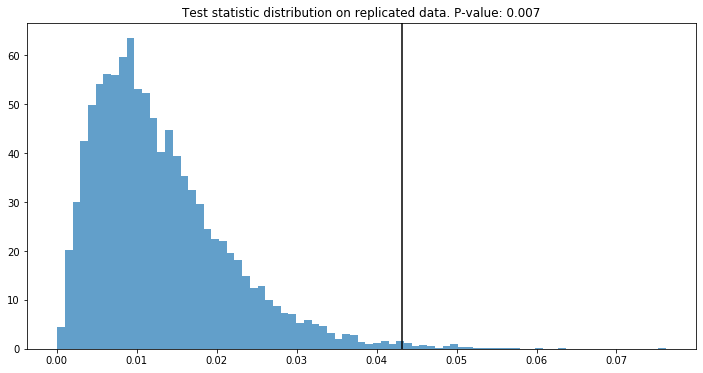

In [4]:
"""
The test statistic returns the average improvment rate
for each of the trails conducted.
"""

def test_stats(inout):
    return np.var([inout[i] / control_tot[i] 
                   for i in range(6)])

"""
Sampling from a binomial distribution with i as the replicated 
improvement rate from the posterior of the control group.
"""
replica_stats = []
for i in control_posterior:
    replica_stats.append(test_stats(
        [sts.binom.rvs(control_tot[_], i) 
         for _ in range(6)]))


# Improvment rate of the real control data 
real_stats = test_stats(control_imp)


plt.figure(figsize=(12, 6))
plt.hist(replica_stats, bins='auto', density=True, alpha= .7)
plt.axvline(real_stats, color='black')
plt.title('Test statistic distribution on replicated data. P-value: %.3f' % 
         (np.mean(np.array(replica_stats) > real_stats)))
plt.show()